In [66]:
import pandas as pd
import numpy as np

import os,json,shutil
import pickle

In [67]:
def get_all_file_path(source_dir,ext='.csv'):
    """
    all images with csv extension exist in set of dirs
    """
    op =[]
    for root, dirs, files in os.walk(source_dir):
        for file in files:
            if file.endswith(ext):
                
                 op.append(os.path.join(os.path.abspath(root), file))
    return op

#### convert video to image 

In [10]:
all_files = get_all_file_path('/home/prateek/Desktop/Video_Data/Video/4.Hot_mill_view/',ext=".mp4")

cap = cv2.VideoCapture(all_files[0])
dump_path = 'train_frame/'
i = 0
skip_frame = 5
for vid_file in all_files:
    cap = cv2.VideoCapture(vid_file)
    while True:
        ret, frame = cap.read()
        for idx in range(skip_frame):
            ret,frame = cap.read()
        if not ret:
            break
        i+=1
        cv2.imwrite(dump_path+str(i).zfill(6)+'.jpg',frame)

#### conversion to chainercv format (converts csv from gtmaker to json) VOC format

In [ ]:
folder_path = 'rect/'

file_names = [i  for i in os.listdir(folder_path) if i.endswith('.csv')]

files_paths = get_all_file_path(folder_path)

In [130]:
name_dict = {
    0:'person',
1:'helmet',
2:'no_helmet',
3:'vest',
4:'no_vest'
}

In [ ]:
all_annos = []
for idx,i in enumerate(files_paths):
    data_dict = {}
    data_dict['complete'] = None
    data_dict['filename'] = file_names[idx].replace('.csv','')
    data = pd.read_csv(i,index_col='index')
    labels = []
    for row_no in range(data.shape[0]):
        try:
            size = {}
            size['x'] = data.iloc[row_no]['width']
            size['y'] = data.iloc[row_no]['height']
            centre = {}
            centre['x'] = int(data.iloc[row_no]['x'] + .5*data.iloc[row_no]['width'])
            centre['y'] = int(data.iloc[row_no]['y'] + .5*data.iloc[row_no]['height'])
            label_dict = {}
            label_dict['label_class'] = name_dict[int(data.iloc[row_no]['label'])]
            label_dict['label_type'] = "box"
            label_dict['object_id'] = row_no
            label_dict['size'] = size
            label_dict['centre'] = centre
            labels.append(label_dict)
        except Exception as e:
            print(e)
    data_dict['labels'] = labels
    with open(i.replace('.jpg.csv','__labels.json'), 'w') as outfile:
        json.dump(data_dict, outfile,sort_keys=True, indent=4) 
    all_annos.append(data_dict)

#### json from multiple format to combined retinanet format(csv)
#### filename, x1, y1,x2, y2, label

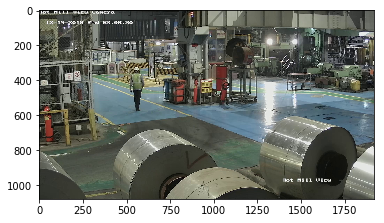

In [221]:
plt.imshow(im)

In [247]:
#convert json file to csv retinanet format
path2srh = '../../downloads/train_data_new/'
all_json = get_all_file_path(path2srh,'.json')
op = []
for i in all_json:
    json_file = open(i)
    json_str = json_file.read()
    json_data = json.loads(json_str)
    
    file_name = os.path.abspath(os.path.join(os.path.dirname(i),json_data['filename']))
    try:
        im = plt.imread(file_name)
        for label in json_data['labels']:
            x1 = max(int(label['centre']['x']-label['size']['x']/2),0)
            y1 = max(int(label['centre']['y']-label['size']['y']/2),0)
            x2 = min(int(label['centre']['x']+label['size']['x']/2),im.shape[1])
            y2 = min(int(label['centre']['y']+label['size']['y']/2),im.shape[0])
            label_name = label['label_class']
            op.append([file_name,x1,y1,x2,y2,label_name])
    except Exception as e:
        print(e)
        

invalid PNG header
[Errno 2] No such file or directory: '/mnt/external_drive/Notebooks/helmet_detection/downloads/train_data_new/train_data/custom_files/141.jpg - Copy'
invalid PNG header
invalid PNG header
[Errno 2] No such file or directory: '/mnt/external_drive/Notebooks/helmet_detection/downloads/train_data_new/train_data/bald men body/47. ra,unisex_tshirt,x2200,fafafa_ca443f4786,front-c,392,146,750,1000-bg,f8f8f8.u2.jpg'
[Errno 2] No such file or directory: '/mnt/external_drive/Notebooks/helmet_detection/downloads/train_data_new/train_data/bald men body/63. ra,fitted_scoop,x2000,fafafa_ca443f4786,front-c,285,143,750,1000-bg,f8f8f8.u2.jpg'
[Errno 2] No such file or directory: '/mnt/external_drive/Notebooks/helmet_detection/downloads/train_data_new/train_data/construction_labours/92. road-repairing-under-construction-traffic-workers-labours-gokhale-picture-id683824684_s=612x612.jpg'
[Errno 2] No such file or directory: '/mnt/external_drive/Notebooks/helmet_detection/downloads/train_

#### convert filename, x1, x2, y1, y2, label back to json

In [ ]:
all_annos = []
for idx,i in enumerate(files_paths):
    data_dict = {}
    data_dict['complete'] = None
    data_dict['filename'] = file_names[idx].replace('.csv','')
    data = pd.read_csv(i,index_col='index')
    labels = []
    for row_no in range(data.shape[0]):
        try:
            size = {}
            size['x'] = data.iloc[row_no]['width']
            size['y'] = data.iloc[row_no]['height']
            centre = {}
            centre['x'] = int(data.iloc[row_no]['x'] + .5*data.iloc[row_no]['width'])
            centre['y'] = int(data.iloc[row_no]['y'] + .5*data.iloc[row_no]['height'])
            label_dict = {}
            label_dict['label_class'] = name_dict[int(data.iloc[row_no]['label'])]
            label_dict['label_type'] = "box"
            label_dict['object_id'] = row_no
            label_dict['size'] = size
            label_dict['centre'] = centre
            labels.append(label_dict)
        except Exception as e:
            print(e)
    data_dict['labels'] = labels
    with open(i.replace('.jpg.csv','__labels.json'), 'w') as outfile:
        json.dump(data_dict, outfile,sort_keys=True, indent=4) 
    all_annos.append(data_dict)

#### data transfer utility

In [248]:
annos = pd.DataFrame(op)

In [26]:
#mkdir ../consolidated_data/images_1

In [249]:
!sudo rm -r image_google_data/

In [250]:
mkdir image_google_data

#### 1. copying and renaming files

In [251]:
folder_path = 'image_google_data/'
op_str_li = []
files_copied = {}
idx = 0
drop_rows = []
for idx_annos,i in enumerate(annos[0].tolist()):
    try:
        # renaming each file as ordered list.
        file_name = os.path.basename(i)
        op_str = str(idx).zfill(6)+os.path.splitext(i)[1]
        # copying files from 
        if file_name not in files_copied.keys():
            shutil.copy(i,os.path.join(folder_path,op_str))
            files_copied[file_name] = op_str
            idx+=1
        op_str_li.append(os.path.abspath(folder_path+files_copied[file_name]))
    except Exception as e:
        drop_rows.append(idx_annos)
        print(e)

In [253]:
annos.drop(drop_rows,inplace=True)

In [254]:
annos[0] = op_str_li

annos.to_csv('image_google_data.csv',header=None,index=False)

In [256]:
len(os.listdir('image_hot_mill_view'))

1380

In [39]:
annos = pd.read_csv('label_annos_info_abspath.csv',header=None)

##### -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### convert gtmaker to retinanet format

In [68]:
name_dict = {
    0:'person',
1:'helmet',
2:'no_helmet',
3:'vest',
4:'no_vest',
5:'worker'    
}

In [40]:
#rm -r {path2search+'_retinanet.csv'}

In [41]:
#max([int(os.path.basename(i).replace('.jpg.csv','')) for i in  all_files])

In [ ]:
# for location in ['5.In_front_of_engineering',
#  '10.Gate-5 warehouse truck loading',
#  '6.Engineering_Store',
#  '1.Gate-1_Sawing_Machine_Area',
#  '7.Roll_Assembly',
#  '9.Stacker_bay_devi_stack_counter',
#  '8.In_front_of_engineering_and_canteen']:

In [77]:
folders

['101-200', '1-100', '301-400', '401-500', '501-600', '701-800']

In [83]:
#for f in folders:
    path2search = '../../../dataset/helmet_n_vest/annealing_view_low_light_26_04_2019/101-200/'#+f + '/'
    image_folder_path = path2search+'train_frame/'
    all_files = get_all_file_path(path2search)

In [84]:
    # remove old retinanet csv
    try:
        os.remove(path2search+'_retinanet.csv')
    except Exception as e:
        print(e)

[Errno 2] No such file or directory: '../../../dataset/helmet_n_vest/annealing_view_low_light_26_04_2019/101-200/_retinanet.csv'


In [85]:
    all_files = [i for i in all_files if ((not i.endswith('labels.csv')) and( 'rect' in i))]
    for i in all_files:
        df = pd.read_csv(i)
        df = df[(df.label>=0)&(df.label<6)]
        df['filename'] = os.path.abspath(os.path.join(image_folder_path,os.path.basename(i).replace('.csv','')))
        df['x2'] = df['x']+df['width']
        df['y2'] = df['y']+df['height']
        df['label'] = df.label.apply(lambda x:name_dict[x] )
        df[['filename','x','y','x2','y2','label']].to_csv(path2search+'_retinanet.csv',header=False,index=None,mode='a+')
        print('wrote=',path2search+'_retinanet.csv')

wrote= ../../../dataset/helmet_n_vest/annealing_view_low_light_26_04_2019/101-200/_retinanet.csv
wrote= ../../../dataset/helmet_n_vest/annealing_view_low_light_26_04_2019/101-200/_retinanet.csv
wrote= ../../../dataset/helmet_n_vest/annealing_view_low_light_26_04_2019/101-200/_retinanet.csv
wrote= ../../../dataset/helmet_n_vest/annealing_view_low_light_26_04_2019/101-200/_retinanet.csv
wrote= ../../../dataset/helmet_n_vest/annealing_view_low_light_26_04_2019/101-200/_retinanet.csv
wrote= ../../../dataset/helmet_n_vest/annealing_view_low_light_26_04_2019/101-200/_retinanet.csv
wrote= ../../../dataset/helmet_n_vest/annealing_view_low_light_26_04_2019/101-200/_retinanet.csv
wrote= ../../../dataset/helmet_n_vest/annealing_view_low_light_26_04_2019/101-200/_retinanet.csv
wrote= ../../../dataset/helmet_n_vest/annealing_view_low_light_26_04_2019/101-200/_retinanet.csv
wrote= ../../../dataset/helmet_n_vest/annealing_view_low_light_26_04_2019/101-200/_retinanet.csv
wrote= ../../../dataset/helmet

wrote= ../../../dataset/helmet_n_vest/annealing_view_low_light_26_04_2019/101-200/_retinanet.csv
wrote= ../../../dataset/helmet_n_vest/annealing_view_low_light_26_04_2019/101-200/_retinanet.csv
wrote= ../../../dataset/helmet_n_vest/annealing_view_low_light_26_04_2019/101-200/_retinanet.csv
wrote= ../../../dataset/helmet_n_vest/annealing_view_low_light_26_04_2019/101-200/_retinanet.csv
wrote= ../../../dataset/helmet_n_vest/annealing_view_low_light_26_04_2019/101-200/_retinanet.csv
wrote= ../../../dataset/helmet_n_vest/annealing_view_low_light_26_04_2019/101-200/_retinanet.csv
wrote= ../../../dataset/helmet_n_vest/annealing_view_low_light_26_04_2019/101-200/_retinanet.csv


### ---------------------------------------------------------------------------------------------------------------------------------------------------

In [80]:
os.path.exists('/home/ubuntu/Notebooks/dataset/helmet_n_vest/hot_mill_view_low_light_26_04_2019/Train_Frame/101-200/train_frame/000179.jpg')

True

In [81]:
import matplotlib.pyplot as plt

In [82]:
plt.imread('/home/ubuntu/Notebooks/dataset/helmet_n_vest/hot_mill_view_low_light_26_04_2019/Train_Frame/101-200/train_frame/000179.jpg')

OSError: cannot identify image file '/home/ubuntu/Notebooks/dataset/helmet_n_vest/hot_mill_view_low_light_26_04_2019/Train_Frame/101-200/train_frame/000179.jpg'

In [60]:
    df[['filename','x','y','x2','y2','label']].to_csv(path2search+'_retinanet.csv',header=False,index=None,mode='a+')

In [61]:
pd.read_csv(path2search+'_retinanet.csv')

,/home/ubuntu/Notebooks/dataset/helmet_n_vest/helmet_vest_8_04_2019/8.In_front_of_engineering_and_canteen/train_frame/003371.jpg,314,201,395,430,person
0,/home/ubuntu/Notebooks/dataset/helmet_n_vest/h...,325,201,365,247,helmet
1,/home/ubuntu/Notebooks/dataset/helmet_n_vest/h...,319,238,381,325,vest


In [62]:
df

,index,label,x,y,width,height,Unnamed: 6,filename,x2,y2
0,0,person,314,201,81,229,NaN,/home/ubuntu/Notebooks/dataset/helmet_n_vest/h...,395,430
1,1,helmet,325,201,40,46,NaN,/home/ubuntu/Notebooks/dataset/helmet_n_vest/h...,365,247
2,2,vest,319,238,62,87,NaN,/home/ubuntu/Notebooks/dataset/helmet_n_vest/h...,381,325
